PROYECTO CÁNCER DE SENO

El cáncer de seno (mama) se origina cuando las células mamarias comienzan a crecer sin control. Las células cancerosas del seno normalmente forman un tumor que a menudo se puede observar en una radiografía o se puede palpar como una masa o bulto.
Es importante que sepa que la mayoría de los bultos en los senos son benignos y no cancerosos (malignos). Los tumores no cancerosos de los senos (benignos) son crecimientos anormales, pero no se propagan fuera de los senos. Estos tumores no representan un peligro para la vida, aunque algunos tipos de bultos benignos pueden aumentar el riesgo de una mujer de padecer cáncer de seno. Cualquier bulto o cambio en el seno debe ser examinado por un profesional de atención médica para saber si es benigno o maligno (cáncer), y si podría afectar su riesgo futuro de padecer cáncer. 

INSTALACIÓN DE LIBRERIAS

In [1]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import multiprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



CARGAMOS EL DATASET

In [2]:
df = pd.read_csv('./data.csv',sep=',',encoding='latin1')
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


SE ELIMINA LA VARIABLE ID PORQUE NO APORTA AL MODELO

In [3]:
df.set_index('id', inplace=True)
df = df.drop(['Unnamed: 32'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


REVISAMOS QUE NO HAYA VALORES NULOS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

Convertimos la varible que deseamos predecir en numeros.
Para lo cual se asignara 1 para Maligno y 0 para Benigno

In [5]:
df.diagnosis = df.diagnosis.replace('M', 1)
df.diagnosis = df.diagnosis.replace('B', 0)
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [6]:
# Dimensiones del dataset
# ==============================================================================
df.shape

(569, 31)

In [7]:
# Número de datos ausentes por variable
# ==============================================================================
df.isna().sum().sort_values()

diagnosis                  0
concave points_worst       0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
texture_worst              0
radius_worst               0
fractal_dimension_se       0
symmetry_se                0
concave points_se          0
concavity_se               0
compactness_se             0
symmetry_worst             0
smoothness_se              0
perimeter_se               0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
symmetry_mean              0
concave points_mean        0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
area_mean                  0
perimeter_mean             0
texture_mean               0
radius_mean                0
area_se                    0
fractal_dimension_worst    0
dtype: int64

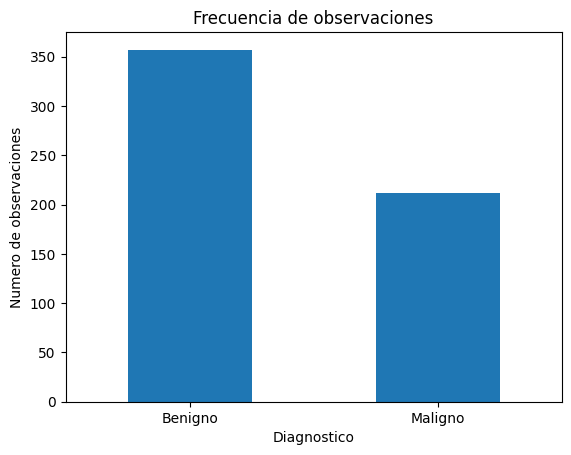

In [8]:
count_classes = pd.value_counts(df['diagnosis'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
LABELS=['Benigno','Maligno']
plt.xticks(range(2), LABELS)
plt.title("Frecuencia de observaciones")
plt.xlabel("Diagnostico")
plt.ylabel("Numero de observaciones");

<AxesSubplot: >

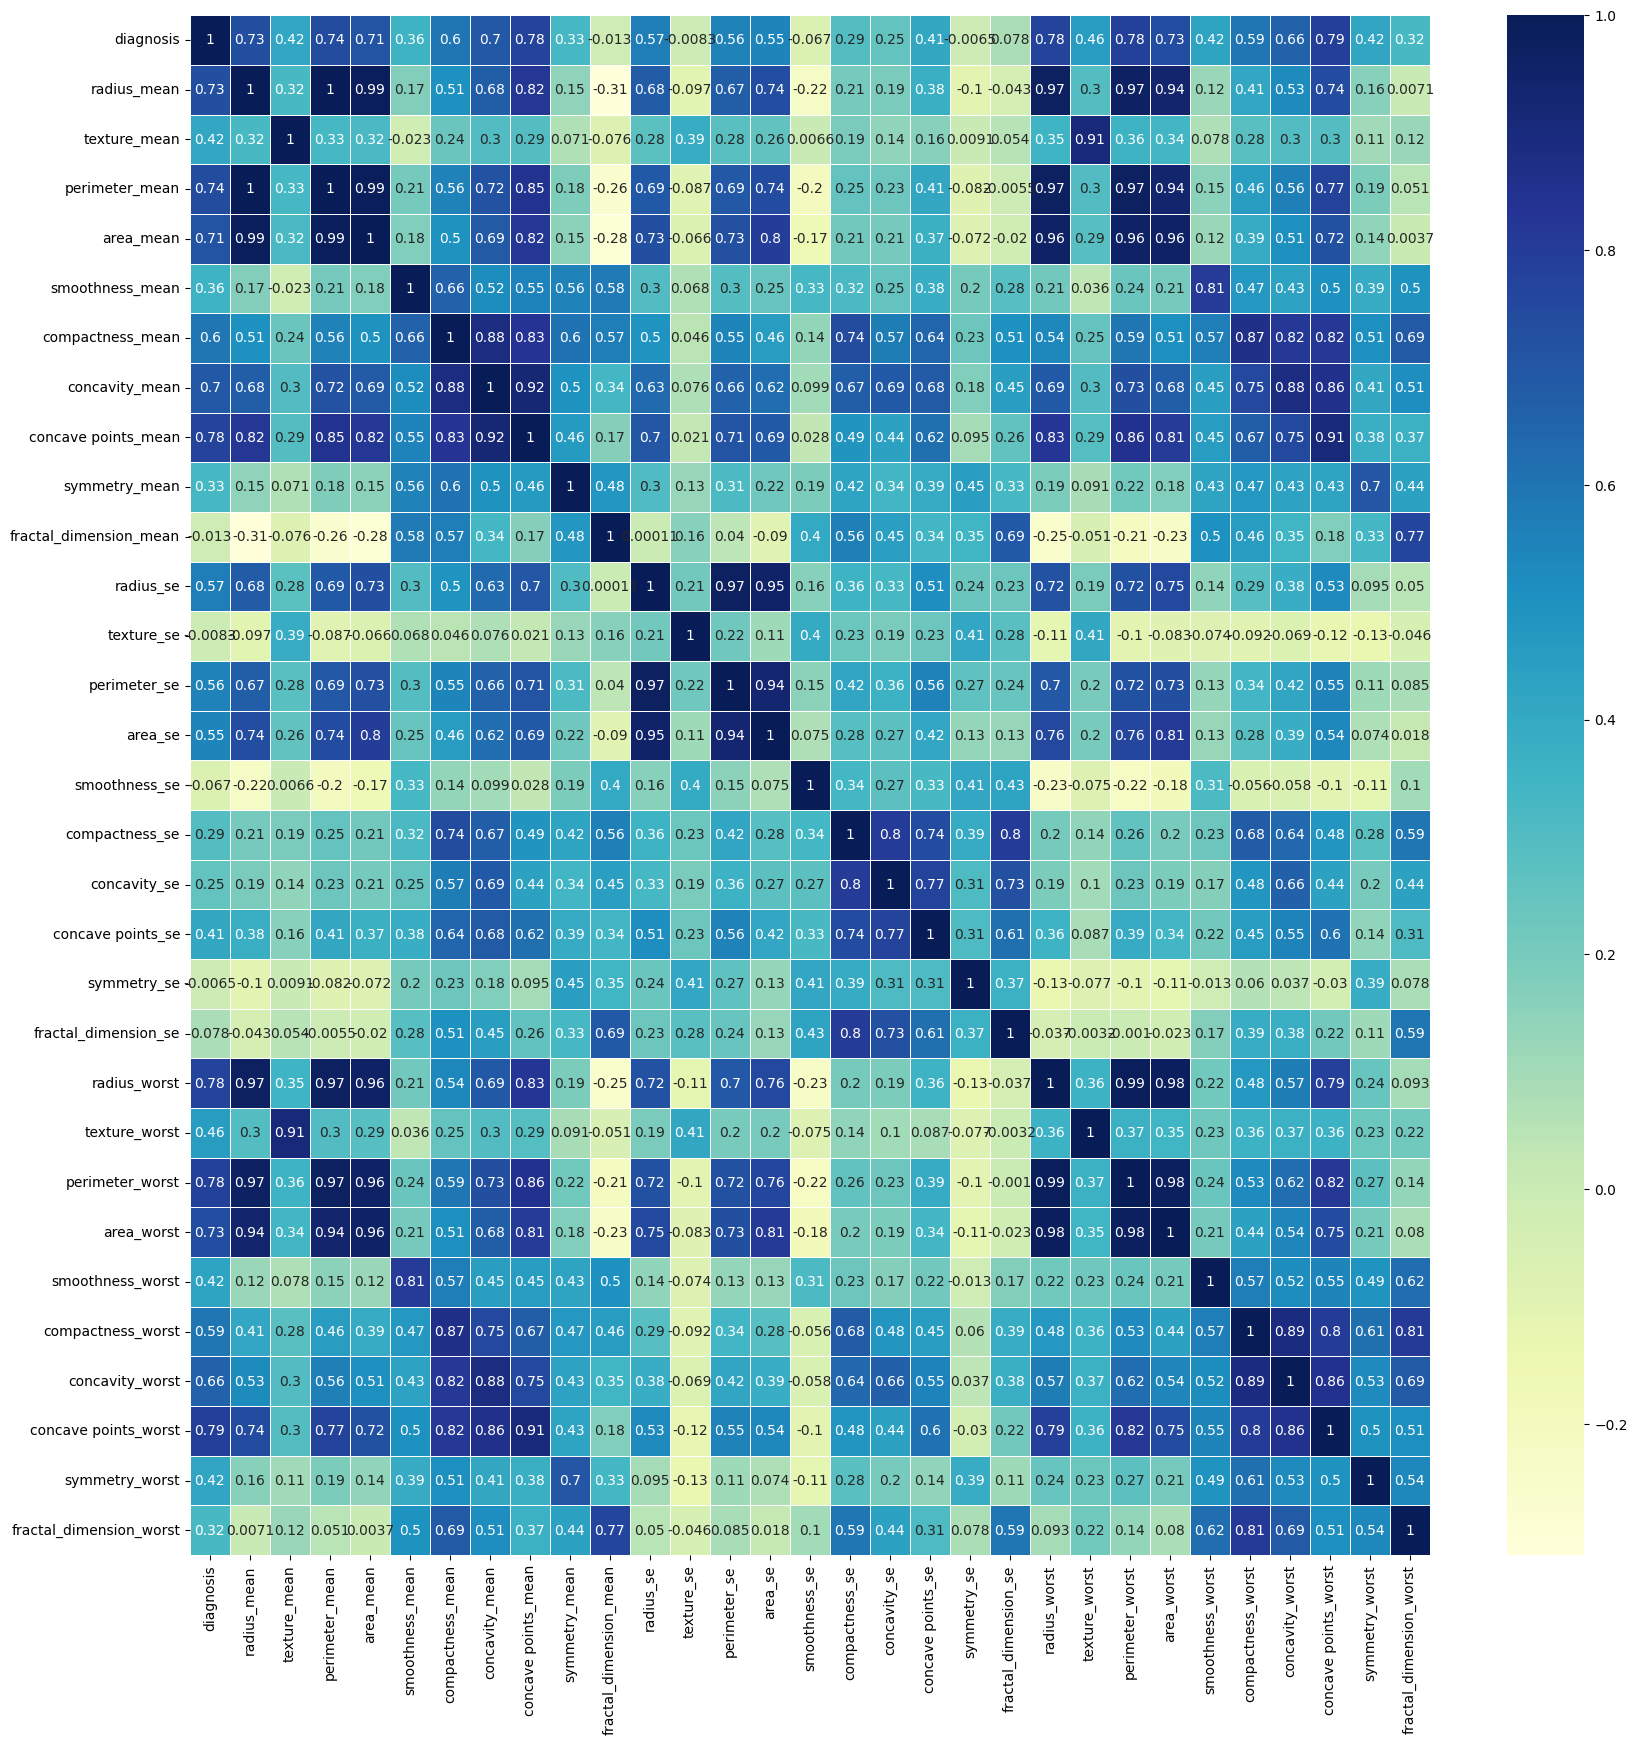

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculamos la matriz de correlacion
corr = df.corr()

# plot
plt.figure(figsize=(20, 20))
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='YlGnBu', linewidths=.5,annot=True)

División train y test

In [10]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('diagnosis', axis = 'columns'),
                                        df['diagnosis'],
                                        train_size   = 0.2,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [11]:
print("BASE COMPLETA")
print(df.diagnosis.value_counts())
print("-----------------------")
print("Partición de test")
print(y_test.value_counts())
print("-----------------------")
print("Partición de train")
print(y_train.value_counts())

BASE COMPLETA
0    357
1    212
Name: diagnosis, dtype: int64
-----------------------
Partición de test
0    287
1    169
Name: diagnosis, dtype: int64
-----------------------
Partición de train
0    70
1    43
Name: diagnosis, dtype: int64


------------------------PREDICCION--------------------

In [12]:
def plot_confusion_matrix(X, y, model):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot()

    plt.show()

In [13]:
# Sin bucle plantilla basica
def evaluate_model(X_train, y_train, X_test, y_test, model):
    print(f"Error training: {(1 - model.score(X_train, y_train)) * 100} %")
    print(f"Error test: {(1 - model.score(X_test, y_test)) * 100} %")
    print("")
    print("")
    print("")


    print("Training confusion matrix")
    plot_confusion_matrix(X_train, y_train, model)
    print("Test confusion matrix")
    plot_confusion_matrix(X_test, y_test, model)

1.- MODELO KNN

Es un clasificador de aprendizaje supervisado no paramétrico, que utiliza la proximidad para hacer clasificaciones o predicciones sobre la agrupación de un punto de datos individual.

Error training: 7.079646017699115 %
Error test: 7.675438596491224 %



Training confusion matrix


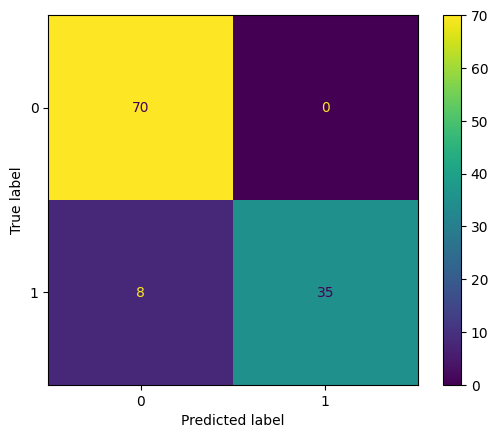

Test confusion matrix


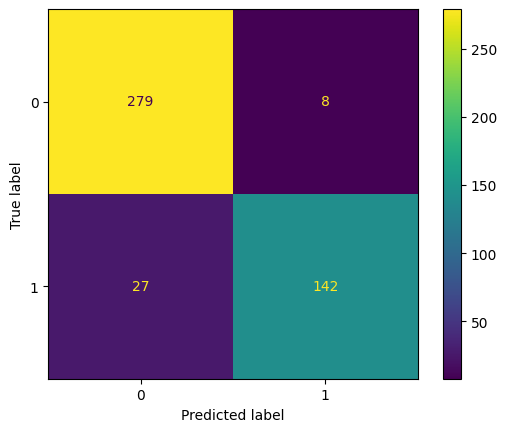

In [14]:

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

evaluate_model(X_train, y_train, X_test, y_test, model)

2.- MODELO BOOSTING

Es una técnica de aprendizaje automático que combina varios clasificadores o modelos débiles para crear un modelo sólido. La idea detrás del impulso es entrenar una secuencia de modelos, cada uno de los cuales se enfoca en los ejemplos que previamente fueron mal clasificados por el modelo anterior.

Error training: 0.0 %
Error test: 5.263157894736848 %



Training confusion matrix


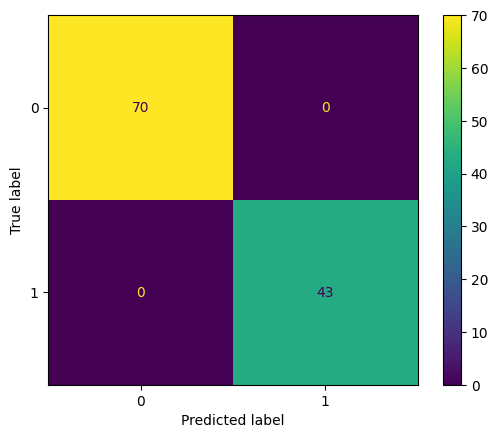

Test confusion matrix


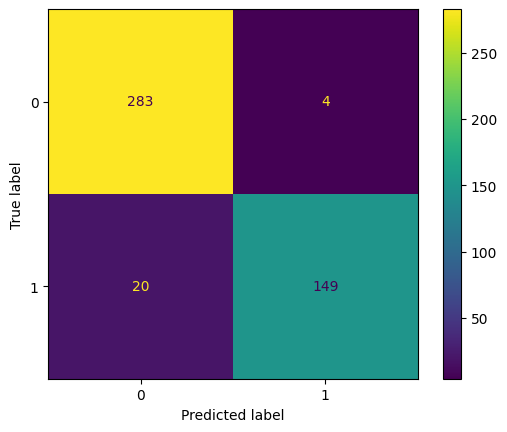

In [15]:

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2,
    max_depth=1, random_state=0)

model = model.fit(X_train, y_train)

evaluate_model(X_train, y_train, X_test, y_test, model)

3.- MODELO SVC

Es un algoritmo de clasificación y regresión desarrollado en la década de los 90, dentro del campo de la ciencia computacional. Aunque inicialmente se desarrolló como un método de clasificación binaria, su aplicación se ha extendido a problemas de clasificación múltiple y regresión. SVMs ha resultado ser uno de los mejores clasificadores para un amplio abanico de situaciones, por lo que se considera uno de los referentes dentro del ámbito de aprendizaje estadístico y machine learning.


Error training: 9.734513274336287 %
Error test: 10.964912280701755 %



Training confusion matrix


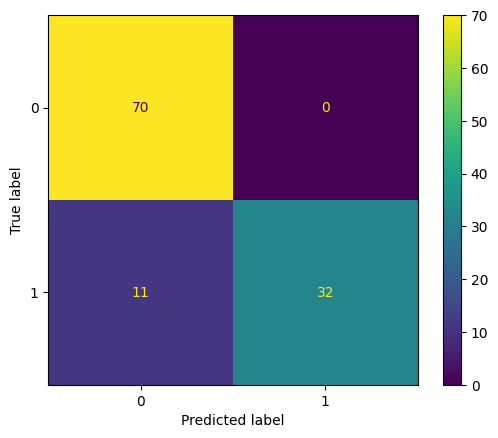

Test confusion matrix


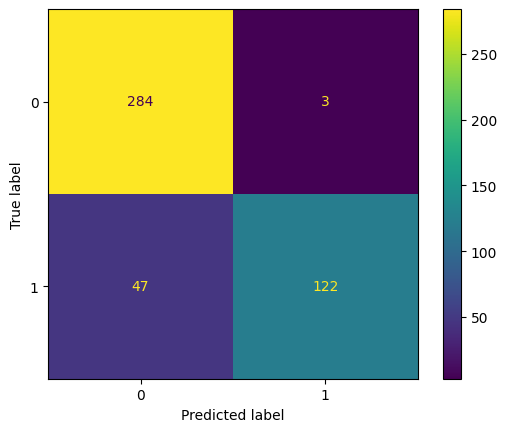

In [16]:

model = SVC()

model = model.fit(X_train, y_train)
evaluate_model(X_train, y_train, X_test, y_test, model)

CONCLUSION:

En el modelo KNN tenemos un error de train de 7.07% y de test de 7.68%, en cuanto a la matriz de confusión tenemos que este modelo predijo correctamente 142 casos de cancer benignos y 279 malignos, los falsos negativos que nos da el modelo es de 27 casos.

El modelo Boosting tenemos un error de train de 0.0% y de test de 5.26%, en cuanto a la matriz de confusión tenemos que este modelo predijo correctamente 283 casos de cancer benignos y 149 malignos, los falsos negativos que nos da el modelo es de 20 casos.

El modelo Boosting tenemos un error de train de 9.73% y de test de 10.96%, en cuanto a la matriz de confusión tenemos que este modelo predijo correctamente 284 casos de cancer benignos y 122 malignos, los falsos negativos que nos da el modelo es de 47 casos.

El modelo Boosting es el que mejor predice la base de datos del cáncer. Debido a que otorga solo 20 casos falsos negativos.